In [7]:
import numpy as np
import pandas as pd


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
zip_folder_path = '/content/drive/MyDrive/football-analytics-course/transfermarkt.zip'

In [3]:
import zipfile
import os

with zipfile.ZipFile(zip_folder_path, 'r') as zip_ref:
    extract_path = os.path.dirname(zip_folder_path)
    zip_ref.extractall(extract_path)

print("Unzipping completed.")

Unzipping completed.


In [6]:
os.listdir(extract_path)

['transfermarkt.zip',
 'appearances.csv',
 'club_games.csv',
 'clubs.csv',
 'competitions.csv',
 'game_events.csv',
 'game_lineups.csv',
 'games.csv',
 'player_valuations.csv',
 'players.csv']

In [10]:
folder_path = '/content/drive/MyDrive/football-analytics-course'

## Games

In [12]:
games_df = pd.read_csv(f'{folder_path}/games.csv')

In [19]:
games_df['home_club_name'].unique()

array(['RFK Akhmat Grozny', 'PFK Krylya Sovetov Samara',
       'PFK CSKA Moskva', 'Футбольный клуб "Локомотив" Москва',
       'FC Rubin Kazan', 'FK Rostov', 'Anzhi Makhachkala ( -2022)',
       'FK Krasnodar', 'Metalist Kharkiv (- 2016)', 'FC Shakhtar Donetsk',
       'Goverla Uzhgorod (- 2016)', 'Metalurg Zaporizhya (-2016)',
       'Vorskla Poltava', 'Dnipro Dnipropetrovsk (-2020)',
       'SK Tavriya Simferopol ( - 2022)', 'Metalurg Donetsk (- 2015)',
       'Lille Olympique Sporting Club Lille Métropole',
       'AS Nancy-Lorraine', 'Paris Saint-Germain Football Club',
       'Stade Rennais Football Club', 'FC Girondins Bordeaux',
       'SC Bastia', 'Stade de Reims', 'Montpellier Hérault Sport Club',
       'Thonon Évian Grand Genève FC',
       'Football Club Lorient-Bretagne Sud', 'FC Sochaux-Montbéliard',
       'Olympique Lyonnais', 'AS Saint-Étienne', 'AC Ajaccio',
       'ESTAC Troyes', "Olympique Gymnaste Club Nice Côte d'Azur",
       'Odense Boldklub', 'Esbjerg fB', 'Ra

In [23]:
club_names = games_df['home_club_name'].unique()
club_names = club_names.astype(str)

In [24]:
for name in club_names:
  if 'bar' in name.lower():
    print(name)

RCD Espanyol Barcelona
Futbol Club Barcelona
SD Eibar
SKA Khabarovsk


In [76]:
barca_name = 'Futbol Club Barcelona'

In [40]:
barca_games_df = games_df[ games_df['home_club_name'] == 'Futbol Club Barcelona' ]
barca_games_df.head(5)

,game_id,competition_id,season,round,date,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,...,stadium,attendance,referee,url,home_club_formation,away_club_formation,home_club_name,away_club_name,aggregate,competition_type
367,2421870,CDR,2013,Quarter-Finals 2nd leg,2014-01-29,131,3368,5,1,NaN,...,Spotify Camp Nou,25551.0,Undiano Mallenco,https://www.transfermarkt.co.uk/spielbericht/i...,NaN,NaN,Futbol Club Barcelona,Levante UD,5:1,domestic_cup
690,2594656,ES1,2015,19. Matchday,2016-01-09,131,16795,4,0,1.0,...,Spotify Camp Nou,69091.0,Carlos Velasco Carballo,https://www.transfermarkt.co.uk/fc-barcelona_g...,NaN,NaN,Futbol Club Barcelona,Granada Club de Fútbol S.A.D.,4:0,domestic_league
805,2675295,CL,2015,Quarter-Finals 1st leg,2016-04-05,131,13,2,1,NaN,...,Spotify Camp Nou,88534.0,Dr. Felix Brych,https://www.transfermarkt.co.uk/spielbericht/i...,NaN,NaN,Futbol Club Barcelona,Club Atlético de Madrid S.A.D.,2:1,international_cup
883,2718711,ES1,2016,1. Matchday,2016-08-20,131,150,6,2,1.0,...,Spotify Camp Nou,65731.0,Undiano Mallenco,https://www.transfermarkt.co.uk/fc-barcelona_r...,NaN,NaN,Futbol Club Barcelona,Real Betis Balompié S.A.D.,6:2,domestic_league
891,2718882,ES1,2016,18. Matchday,2017-01-14,131,472,5,0,3.0,...,Spotify Camp Nou,81480.0,Undiano Mallenco,https://www.transfermarkt.co.uk/fc-barcelona_u...,NaN,NaN,Futbol Club Barcelona,Unión Deportiva Las Palmas S.A.D.,5:0,domestic_league


In [129]:
barca_games_df['competition_id'].unique()

array(['CDR', 'ES1', 'CL', 'EL', 'SUC', 'USC', 'KLUB'], dtype=object)

In [29]:
barca_games_df.shape

(318, 23)

In [31]:
barca_games_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 318 entries, 367 to 63427
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   game_id                 318 non-null    int64  
 1   competition_id          318 non-null    object 
 2   season                  318 non-null    int64  
 3   round                   318 non-null    object 
 4   date                    318 non-null    object 
 5   home_club_id            318 non-null    int64  
 6   away_club_id            318 non-null    int64  
 7   home_club_goals         318 non-null    int64  
 8   away_club_goals         318 non-null    int64  
 9   home_club_position      216 non-null    float64
 10  away_club_position      216 non-null    float64
 11  home_club_manager_name  318 non-null    object 
 12  away_club_manager_name  318 non-null    object 
 13  stadium                 318 non-null    object 
 14  attendance              285 non-null  

In [41]:
barca_games_df['attendance'].fillna(barca_games_df['attendance'].mean(), inplace=True)

<ipython-input-41-954156b65e0d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  barca_games_df['attendance'].fillna(barca_games_df['attendance'].mean(), inplace=True)


In [42]:
barca_games_df['date'] = pd.to_datetime(barca_games_df['date'])

<ipython-input-42-4d8b9185c996>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  barca_games_df['date'] = pd.to_datetime(barca_games_df['date'])


In [66]:
def match_result(row):
    if row['home_club_goals'] > row['away_club_goals']:
        return 'Win'
    elif row['home_club_goals'] < row['away_club_goals']:
        return 'Loss'
    else:
        return 'Draw'

barca_games_df['result'] = barca_games_df.apply(match_result, axis=1)

<ipython-input-66-b9fb494c2784>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  barca_games_df['result'] = barca_games_df.apply(match_result, axis=1)


In [43]:
barca_games_df['goal_difference'] = abs(barca_games_df['home_club_goals'] - barca_games_df['away_club_goals'])

<ipython-input-43-21540d7939dc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  barca_games_df['goal_difference'] = abs(barca_games_df['home_club_goals'] - barca_games_df['away_club_goals'])


In [44]:
barca_games_df.drop(columns=['url', 'home_club_formation', 'away_club_formation'], axis=1, inplace=True)

<ipython-input-44-7f5724066a31>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  barca_games_df.drop(columns=['url', 'home_club_formation', 'away_club_formation'], axis=1, inplace=True)


In [45]:
barca_games_df.head(5)

,game_id,competition_id,season,round,date,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,...,home_club_manager_name,away_club_manager_name,stadium,attendance,referee,home_club_name,away_club_name,aggregate,competition_type,goal_difference
367,2421870,CDR,2013,Quarter-Finals 2nd leg,2014-01-29,131,3368,5,1,NaN,...,Gerardo Martino,Joaquín Caparrós,Spotify Camp Nou,25551.0,Undiano Mallenco,Futbol Club Barcelona,Levante UD,5:1,domestic_cup,4
690,2594656,ES1,2015,19. Matchday,2016-01-09,131,16795,4,0,1.0,...,Luis Enrique,José Ramón Sandoval,Spotify Camp Nou,69091.0,Carlos Velasco Carballo,Futbol Club Barcelona,Granada Club de Fútbol S.A.D.,4:0,domestic_league,4
805,2675295,CL,2015,Quarter-Finals 1st leg,2016-04-05,131,13,2,1,NaN,...,Luis Enrique,Diego Simeone,Spotify Camp Nou,88534.0,Dr. Felix Brych,Futbol Club Barcelona,Club Atlético de Madrid S.A.D.,2:1,international_cup,1
883,2718711,ES1,2016,1. Matchday,2016-08-20,131,150,6,2,1.0,...,Luis Enrique,Gustavo Poyet,Spotify Camp Nou,65731.0,Undiano Mallenco,Futbol Club Barcelona,Real Betis Balompié S.A.D.,6:2,domestic_league,4
891,2718882,ES1,2016,18. Matchday,2017-01-14,131,472,5,0,3.0,...,Luis Enrique,Quique Setién,Spotify Camp Nou,81480.0,Undiano Mallenco,Futbol Club Barcelona,Unión Deportiva Las Palmas S.A.D.,5:0,domestic_league,5


In [46]:
barca_games_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 318 entries, 367 to 63427
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   game_id                 318 non-null    int64         
 1   competition_id          318 non-null    object        
 2   season                  318 non-null    int64         
 3   round                   318 non-null    object        
 4   date                    318 non-null    datetime64[ns]
 5   home_club_id            318 non-null    int64         
 6   away_club_id            318 non-null    int64         
 7   home_club_goals         318 non-null    int64         
 8   away_club_goals         318 non-null    int64         
 9   home_club_position      216 non-null    float64       
 10  away_club_position      216 non-null    float64       
 11  home_club_manager_name  318 non-null    object        
 12  away_club_manager_name  318 non-null    object

In [49]:
home_wins = sum(barca_games_df['home_club_goals'] > barca_games_df['away_club_goals'])
away_wins = sum(barca_games_df['away_club_goals'] > barca_games_df['home_club_goals'])
draws = sum(barca_games_df['home_club_goals'] == barca_games_df['away_club_goals'])

average_home_goals = barca_games_df['home_club_goals'].mean()
average_away_goals = barca_games_df['away_club_goals'].mean()

average_attendance = barca_games_df['attendance'].mean()
max_attendance = barca_games_df['attendance'].max()
min_attendance = barca_games_df['attendance'].min()

print("Home Wins:", home_wins, "Away Wins:", away_wins, "Draws:", draws)
print("Average Home Goals:", average_home_goals, "Average Away Goals:", average_away_goals)
print("Average Attendance:", average_attendance, "Max Attendance:", max_attendance, "Min Attendance:", min_attendance)

Home Wins: 245 Away Wins: 33 Draws: 40
Average Home Goals: 2.779874213836478 Average Away Goals: 0.8459119496855346
Average Attendance: 71095.8350877193 Max Attendance: 99354.0 Min Attendance: 20384.0


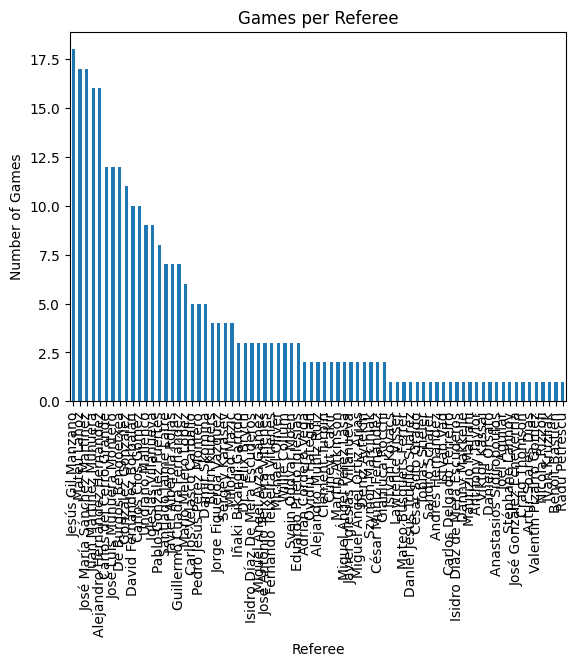

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

referee_count = barca_games_df['referee'].value_counts()
referee_count.plot(kind='bar')
plt.title('Games per Referee')
plt.ylabel('Number of Games')
plt.xlabel('Referee')

plt.show()

In [64]:
referee_count.sort_values(ascending=False).head(5)

Jesús Gil Manzano                18
José María Sánchez Martínez      17
Mateu Lahoz                      17
Juan Martínez Munuera            16
Alejandro Hernández Hernández    16
Name: referee, dtype: int64

In [63]:
top_referees = referee_count.sort_values(ascending=False).head(5).index
top_referees

Index(['Jesús Gil Manzano', 'José María Sánchez Martínez', 'Mateu Lahoz',
       'Juan Martínez Munuera', 'Alejandro Hernández Hernández'],
      dtype='object')

In [69]:
win_rate_top_refs = barca_games_df[barca_games_df['referee'].isin(top_referees)].groupby('referee')['result'].apply(lambda x: (x == 'Win').mean())

overall_win_rate = (barca_games_df['result'] == 'Win').mean()

print("Win Rate with Top Referees:\n", win_rate_top_refs)
print("\nOverall Win Rate:\n", overall_win_rate)

Win Rate with Top Referees:
 referee
Alejandro Hernández Hernández    0.687500
Jesús Gil Manzano                0.777778
José María Sánchez Martínez      0.823529
Juan Martínez Munuera            0.750000
Mateu Lahoz                      0.647059
Name: result, dtype: float64

Overall Win Rate:
 0.7704402515723271


## Clubs

In [73]:
clubs_df = pd.read_csv(f'{folder_path}/clubs.csv')

In [74]:
clubs_df.head(5)

,club_id,club_code,name,domestic_competition_id,total_market_value,squad_size,average_age,foreigners_number,foreigners_percentage,national_team_players,stadium_name,stadium_seats,net_transfer_record,coach_name,last_season,filename,url
0,105,sv-darmstadt-98,Sportverein Darmstadt 1898 e. V.,L1,NaN,28,26.6,10,35.7,1,Merck-Stadion am Böllenfalltor,17810,€-1.60m,NaN,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/sv-darmstadt-9...
1,11127,ural-ekaterinburg,FK Ural Yekaterinburg,RU1,NaN,26,28.0,14,53.8,5,Yekaterinburg Arena,23000,€-770k,NaN,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/ural-ekaterinb...
2,114,besiktas-istanbul,Beşiktaş Jimnastik Kulübü,TR1,NaN,31,27.4,15,48.4,12,Tüpraş Stadyumu,42590,€-14.50m,NaN,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/besiktas-istan...
3,12,as-rom,Associazione Sportiva Roma,IT1,NaN,26,27.5,17,65.4,17,Olimpico di Roma,73261,+€64.80m,NaN,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/as-rom/startse...
4,148,tottenham-hotspur,Tottenham Hotspur Football Club,GB1,NaN,31,26.2,22,71.0,21,Tottenham Hotspur Stadium,62062,€-129.90m,NaN,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/tottenham-hots...


In [75]:
clubs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426 entries, 0 to 425
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   club_id                  426 non-null    int64  
 1   club_code                426 non-null    object 
 2   name                     426 non-null    object 
 3   domestic_competition_id  426 non-null    object 
 4   total_market_value       0 non-null      float64
 5   squad_size               426 non-null    int64  
 6   average_age              388 non-null    float64
 7   foreigners_number        426 non-null    int64  
 8   foreigners_percentage    378 non-null    float64
 9   national_team_players    426 non-null    int64  
 10  stadium_name             426 non-null    object 
 11  stadium_seats            426 non-null    int64  
 12  net_transfer_record      426 non-null    object 
 13  coach_name               0 non-null      float64
 14  last_season              4

In [79]:
barca_clubs_df = clubs_df[ clubs_df['name'] == barca_name]

In [78]:
clubs_df.drop(columns=['total_market_value', 'coach_name', 'url', 'filename', 'club_code', 'coach_name', 'last_season'], index=1, inplace=True)

In [80]:
barca_clubs_df

,club_id,name,domestic_competition_id,squad_size,average_age,foreigners_number,foreigners_percentage,national_team_players,stadium_name,stadium_seats,net_transfer_record
65,131,Futbol Club Barcelona,ES1,22,26.4,11,50.0,16,Olímpic Lluís Companys,49472,+€62.00m


In [92]:
barca_club_id = barca_clubs_df['club_id'].values[0]
barca_club_id

131

## Appearences

In [84]:
appearances_df = pd.read_csv(f'{folder_path}/appearances.csv')

In [85]:
appearances_df.head(5)

,appearance_id,game_id,player_id,player_club_id,player_current_club_id,date,player_name,competition_id,yellow_cards,red_cards,goals,assists,minutes_played
0,2231978_38004,2231978,38004,853,235,2012-07-03,Aurélien Joachim,CLQ,0,0,2,0,90
1,2233748_79232,2233748,79232,8841,2698,2012-07-05,Ruslan Abyshov,ELQ,0,0,0,0,90
2,2234413_42792,2234413,42792,6251,465,2012-07-05,Sander Puri,ELQ,0,0,0,0,45
3,2234418_73333,2234418,73333,1274,6646,2012-07-05,Vegar Hedenstad,ELQ,0,0,0,0,90
4,2234421_122011,2234421,122011,195,3008,2012-07-05,Markus Henriksen,ELQ,0,0,0,1,90


In [86]:
appearances_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1447580 entries, 0 to 1447579
Data columns (total 13 columns):
 #   Column                  Non-Null Count    Dtype 
---  ------                  --------------    ----- 
 0   appearance_id           1447580 non-null  object
 1   game_id                 1447580 non-null  int64 
 2   player_id               1447580 non-null  int64 
 3   player_club_id          1447580 non-null  int64 
 4   player_current_club_id  1447580 non-null  int64 
 5   date                    1447580 non-null  object
 6   player_name             1447256 non-null  object
 7   competition_id          1447580 non-null  object
 8   yellow_cards            1447580 non-null  int64 
 9   red_cards               1447580 non-null  int64 
 10  goals                   1447580 non-null  int64 
 11  assists                 1447580 non-null  int64 
 12  minutes_played          1447580 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 143.6+ MB


In [94]:
barca_appearances_df = appearances_df[ appearances_df['player_club_id'] == barca_club_id ]
barca_appearances_df.head(5)

,appearance_id,game_id,player_id,player_club_id,player_current_club_id,date,player_name,competition_id,yellow_cards,red_cards,goals,assists,minutes_played
8129,2244378_141834,2244378,141834,131,150,2012-08-19,Cristian Tello,ES1,0,0,0,2,90
8132,2244378_15951,2244378,15951,131,131,2012-08-19,Dani Alves,ES1,0,0,0,0,90
8133,2244378_18944,2244378,18944,131,131,2012-08-19,Gerard Piqué,ES1,0,0,0,0,40
8134,2244378_19981,2244378,19981,131,131,2012-08-19,Javier Mascherano,ES1,1,0,0,0,90
8135,2244378_28003,2244378,28003,131,583,2012-08-19,Lionel Messi,ES1,0,0,2,0,90


In [95]:
barca_appearances_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8540 entries, 8129 to 1446687
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   appearance_id           8540 non-null   object
 1   game_id                 8540 non-null   int64 
 2   player_id               8540 non-null   int64 
 3   player_club_id          8540 non-null   int64 
 4   player_current_club_id  8540 non-null   int64 
 5   date                    8540 non-null   object
 6   player_name             8540 non-null   object
 7   competition_id          8540 non-null   object
 8   yellow_cards            8540 non-null   int64 
 9   red_cards               8540 non-null   int64 
 10  goals                   8540 non-null   int64 
 11  assists                 8540 non-null   int64 
 12  minutes_played          8540 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 934.1+ KB


In [96]:
total_appearances = len(barca_appearances_df)
total_goals = barca_appearances_df['goals'].sum()
total_assists = barca_appearances_df['assists'].sum()
total_yellow_cards = barca_appearances_df['yellow_cards'].sum()
total_red_cards = barca_appearances_df['red_cards'].sum()
average_minutes = barca_appearances_df['minutes_played'].mean()

print(f"Total Appearances: {total_appearances}")
print(f"Total Goals: {total_goals}")
print(f"Total Assists: {total_assists}")
print(f"Total Yellow Cards: {total_yellow_cards}")
print(f"Total Red Cards: {total_red_cards}")
print(f"Average Minutes Played: {average_minutes:.2f}\n")

Total Appearances: 8540
Total Goals: 1424
Total Assists: 1135
Total Yellow Cards: 1214
Total Red Cards: 20
Average Minutes Played: 70.07



In [97]:
top_scorers = barca_appearances_df.groupby('player_name')['goals'].sum().sort_values(ascending=False).head(5)

print("Top Goal Scorers:")
print(top_scorers)

Top Goal Scorers:
player_name
Lionel Messi    411
Luis Suárez     189
Neymar          105
Pedro            41
Gerard Piqué     39
Name: goals, dtype: int64


In [98]:
barca_appearances_df['contribution_per_minute'] = (barca_appearances_df['goals'] + barca_appearances_df['assists']) / barca_appearances_df['minutes_played']
highest_contributors = barca_appearances_df.groupby('player_name')['contribution_per_minute'].mean().sort_values(ascending=False).head(5)

print("\nPlayers with Highest Contribution per Minute:")
print(highest_contributors)


Players with Highest Contribution per Minute:
player_name
Wilfrid Kaptoum      0.041667
Juan Cámara          0.035714
Luuk de Jong         0.035230
Jean Marie Dongou    0.025641
Aleix Vidal          0.024625
Name: contribution_per_minute, dtype: float64


<ipython-input-98-97ee7dbc7d94>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  barca_appearances_df['contribution_per_minute'] = (barca_appearances_df['goals'] + barca_appearances_df['assists']) / barca_appearances_df['minutes_played']


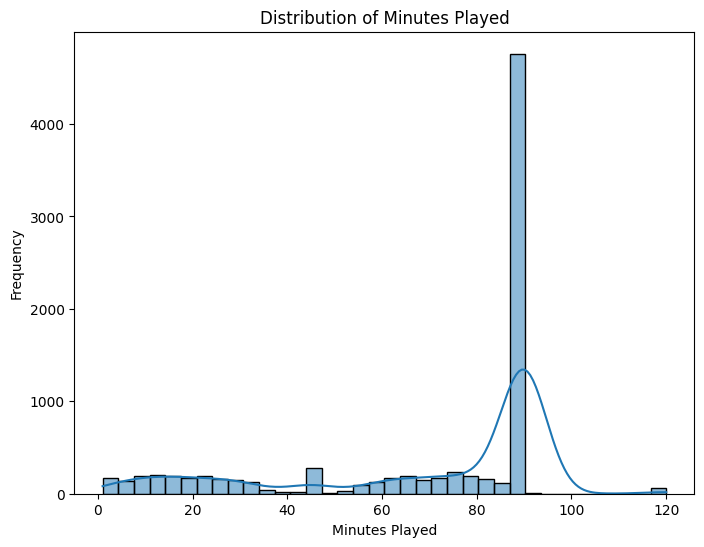

In [99]:
plt.figure(figsize=(8, 6))
sns.histplot(barca_appearances_df['minutes_played'], kde=True)
plt.title('Distribution of Minutes Played')
plt.xlabel('Minutes Played')
plt.ylabel('Frequency')
plt.show()

In [101]:
barca_appearances_df['year'] = pd.to_datetime(barca_appearances_df['date']).dt.year
goals_over_time = barca_appearances_df.groupby('year')['goals'].sum()
assists_over_time = barca_appearances_df.groupby('year')['assists'].sum()

corr_matrix = barca_appearances_df[['goals', 'assists', 'yellow_cards', 'red_cards', 'minutes_played']].corr()

<ipython-input-101-24d786cd169c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  barca_appearances_df['year'] = pd.to_datetime(barca_appearances_df['date']).dt.year


Text(0, 0.5, 'Total Goals')

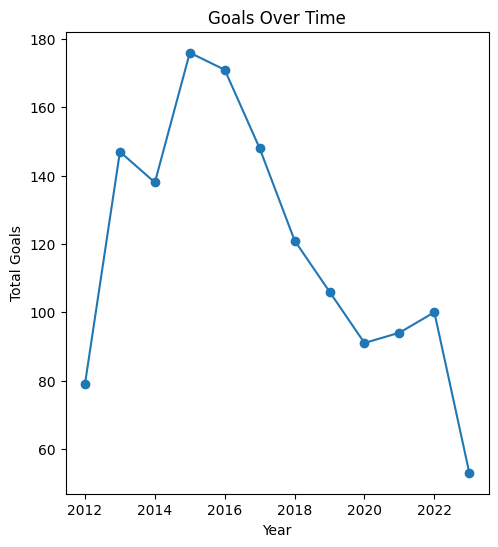

In [102]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
goals_over_time.plot(kind='line', marker='o')
plt.title('Goals Over Time')
plt.xlabel('Year')
plt.ylabel('Total Goals')

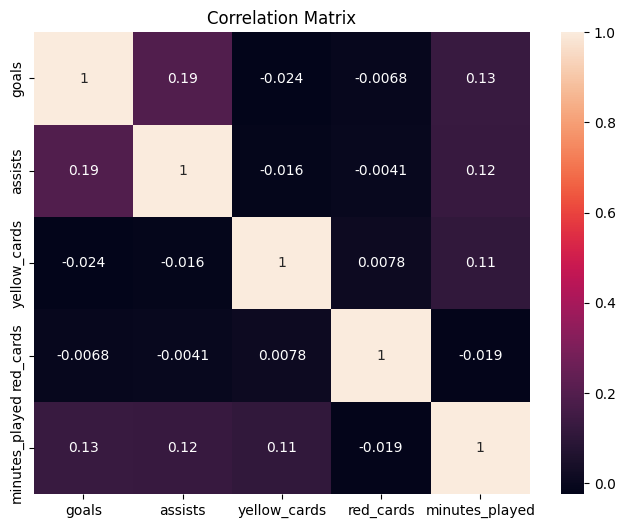

In [104]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

## Game Lineups

In [135]:
game_lineups_df = pd.read_csv(f'{folder_path}/game_lineups.csv')
game_lineups_df.head(5)

,game_lineups_id,game_id,club_id,type,number,player_id,player_name,team_captain,position
0,77b0f371923e0c8bdf050a1e269faaac,3606208,338,starting_lineup,89,419061,Vladyslav Supryaga,0,Centre-Forward
1,1715ec342bf902522b69322a036a3f29,3606208,338,starting_lineup,71,91931,Denys Boyko,0,Goalkeeper
2,d7c22834cb4c20efeddc527511feabad,3606208,338,starting_lineup,34,505463,Oleksandr Syrota,0,Centre-Back
3,113289469cede9376049b78521f7b382,3606208,338,starting_lineup,25,659089,Ilya Zabarnyi,0,Centre-Back
4,e6abe553801b09bc623c3deb96acba17,3606208,338,starting_lineup,16,404842,Vitaliy Mykolenko,0,Left-Back


In [136]:
game_lineups_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145699 entries, 0 to 145698
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   game_lineups_id  145699 non-null  object
 1   game_id          145699 non-null  int64 
 2   club_id          145699 non-null  int64 
 3   type             145699 non-null  object
 4   number           145699 non-null  object
 5   player_id        145699 non-null  int64 
 6   player_name      145699 non-null  object
 7   team_captain     145699 non-null  int64 
 8   position         145699 non-null  object
dtypes: int64(4), object(5)
memory usage: 10.0+ MB


In [137]:
barca_game_lineups_df = game_lineups_df[ game_lineups_df['club_id'] == barca_club_id ]
barca_game_lineups_df.head(5)

,game_lineups_id,game_id,club_id,type,number,player_id,player_name,team_captain,position
85,db391e30146fb46df9c43e639dad58ef,3998377,131,starting_lineup,30,646740,Gavi,0,Central Midfield
86,2fad0046ea23e7eb84c9362e4763cd4e,3998377,131,starting_lineup,8,683840,Pedri,0,Central Midfield
87,c0f281e956238eb6c80af79852648833,3998377,131,starting_lineup,21,326330,Frenkie de Jong,0,Defensive Midfield
88,dfc97aa85252814d5d37b98ef0e585f0,3998377,131,starting_lineup,20,85370,Sergi Roberto,1,Right-Back
89,412a1c3aadd1c5c5813378557b575535,3998377,131,starting_lineup,18,69751,Jordi Alba,0,Left-Back


In [147]:
barca_game_lineups_df['type'].unique()

array(['starting_lineup', 'substitutes'], dtype=object)

In [146]:
game_ids = barca_game_lineups_df['game_id'].unique()
print(game_ids)
print(len(game_ids))

[3998377 4001330 4112811 4112850 4112860 4112873 4112875 4112970 4113052
 4113061 4113069 4113089 4113091 4113106 4113116 4113118 4113120 4113122
 4113124 4113131 4113148 4171316 4174054 4174055 4174065 4174067 4174084]
27


In [145]:

for game_id in game_ids:
    print(f'Game ID: {game_id}') # FIXME add info about actual game

    # Fixing the filtering condition with parentheses
    lineup = barca_game_lineups_df[(barca_game_lineups_df['game_id'] == game_id) &
                                   (barca_game_lineups_df['type'] == 'starting_lineup')]['player_name'].values
    print("Starting Lineup:", lineup)

Game ID: 3998377
Starting Lineup: ['Gavi' 'Pedri' 'Frenkie de Jong' 'Sergi Roberto' 'Jordi Alba'
 'Jules Koundé' 'Ronald Araujo' 'Marc-André ter Stegen' 'Ousmane Dembélé'
 'Raphinha' 'Robert Lewandowski']
Game ID: 4001330
Starting Lineup: ['Jules Koundé' 'Marc-André ter Stegen' 'Frenkie de Jong'
 'Andreas Christensen' 'Alejandro Balde' 'Ronald Araujo' 'Sergio Busquets'
 'Pedri' 'Ousmane Dembélé' 'Gavi' 'Robert Lewandowski']
Game ID: 4112811
Starting Lineup: ['Ronald Araujo' 'Oriol Romeu' 'Robert Lewandowski' 'Raphinha'
 'Marc-André ter Stegen' 'Jules Koundé' 'Alejandro Balde'
 'Andreas Christensen' 'Frenkie de Jong' 'Pedri' 'İlkay Gündoğan']
Game ID: 4112850
Starting Lineup: ['Alejandro Balde' 'Robert Lewandowski' 'Raphinha' 'João Félix'
 'İlkay Gündoğan' 'Pedri' 'Frenkie de Jong' 'João Cancelo' 'Ronald Araujo'
 'Iñaki Peña' 'Jules Koundé']
Game ID: 4112860
Starting Lineup: ['Robert Lewandowski' 'Iñaki Peña' 'Raphinha' 'Ronald Araujo'
 'Jules Koundé' 'Alejandro Balde' 'João Cancelo' 'İ

In [138]:
barca_game_lineups_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 85 to 124727
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   game_lineups_id  569 non-null    object
 1   game_id          569 non-null    int64 
 2   club_id          569 non-null    int64 
 3   type             569 non-null    object
 4   number           569 non-null    object
 5   player_id        569 non-null    int64 
 6   player_name      569 non-null    object
 7   team_captain     569 non-null    int64 
 8   position         569 non-null    object
dtypes: int64(4), object(5)
memory usage: 44.5+ KB


In [153]:
substitutes_df = barca_game_lineups_df[barca_game_lineups_df['type'] == 'substitutes']
substitutes_df.head(5)

,game_lineups_id,game_id,club_id,type,number,player_id,player_name,team_captain,position
96,bab7b118258eae0bcff7e454b03e9fa2,3998377,131,substitutes,24,466794,Eric García,0,Centre-Back
97,996a8d4fbf0bac46109a3cbc3bada5e3,3998377,131,substitutes,14,167850,Memphis Depay,0,Centre-Forward
98,94f3f9a798bdf390f56b0f4b3b373194,3998377,131,substitutes,17,112515,Marcos Alonso,0,Left-Back
99,a578237d8bb20f1a45ab09d47d6f6d4d,3998377,131,substitutes,28,636688,Alejandro Balde,0,Left-Back
100,2ee775858e29ac5e79bab4c58b09384f,3998377,131,substitutes,5,65230,Sergio Busquets,0,Defensive Midfield


In [158]:
# subs_per_game = substitutes_df['game_id'].value_counts()
# plt.figure(figsize=(10, 6))
# sns.histplot(subs_per_game, bins=30, kde=True)
# plt.title('Distribution of Substitutions per Game')
# plt.xlabel('Number of Substitutions')
# plt.ylabel('Frequency')
# plt.show()

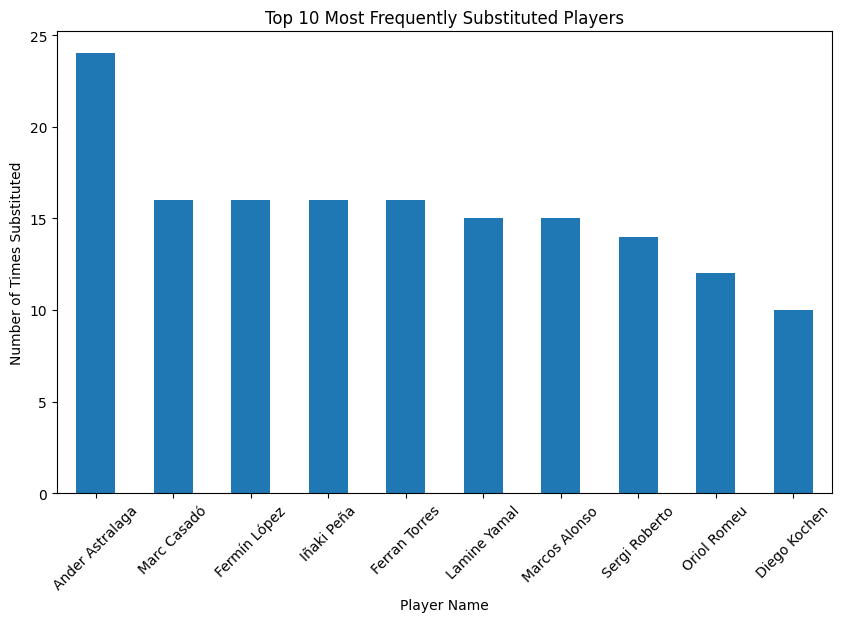

In [155]:
top_substituted_players = substitutes_df['player_name'].value_counts().head(10)
plt.figure(figsize=(10, 6))
top_substituted_players.plot(kind='bar')
plt.title('Top 10 Most Frequently Substituted Players')
plt.xlabel('Player Name')
plt.ylabel('Number of Times Substituted')
plt.xticks(rotation=45)
plt.show()

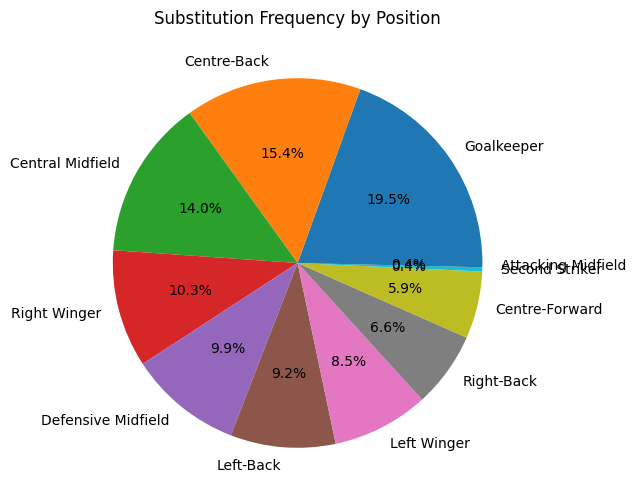

In [156]:
subs_by_position = substitutes_df['position'].value_counts()
plt.figure(figsize=(10, 6))
subs_by_position.plot(kind='pie', autopct='%1.1f%%')
plt.title('Substitution Frequency by Position')
plt.ylabel('')  # Hide y-label for pie chart
plt.show()

In [157]:
captain_subs = substitutes_df[substitutes_df['team_captain'] == 1]
num_captain_subs = len(captain_subs)
print(f"Number of times a substitute became team captain: {num_captain_subs}")


Number of times a substitute became team captain: 0


## Players

In [109]:
players_df = pd.read_csv(f'{folder_path}/players.csv')
players_df.head()

,player_id,first_name,last_name,name,last_season,current_club_id,player_code,country_of_birth,city_of_birth,country_of_citizenship,...,foot,height_in_cm,contract_expiration_date,agent_name,image_url,url,current_club_domestic_competition_id,current_club_name,market_value_in_eur,highest_market_value_in_eur
0,10,Miroslav,Klose,Miroslav Klose,2015,398,miroslav-klose,Poland,Opole,Germany,...,right,184.0,NaN,ASBW Sport Marketing,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/miroslav-klose...,IT1,Società Sportiva Lazio S.p.A.,1000000.0,30000000.0
1,26,Roman,Weidenfeller,Roman Weidenfeller,2017,16,roman-weidenfeller,Germany,Diez,Germany,...,left,190.0,NaN,Neubauer 13 GmbH,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/roman-weidenfe...,L1,Borussia Dortmund,750000.0,8000000.0
2,65,Dimitar,Berbatov,Dimitar Berbatov,2015,1091,dimitar-berbatov,Bulgaria,Blagoevgrad,Bulgaria,...,NaN,NaN,NaN,CSKA-AS-23 Ltd.,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/dimitar-berbat...,GR1,Panthessalonikios Athlitikos Omilos Konstantin...,1000000.0,34500000.0
3,77,NaN,Lúcio,Lúcio,2012,506,lucio,Brazil,Brasília,Brazil,...,NaN,NaN,NaN,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/lucio/profil/s...,IT1,Juventus Football Club,200000.0,24500000.0
4,80,Tom,Starke,Tom Starke,2017,27,tom-starke,East Germany (GDR),Freital,Germany,...,right,194.0,NaN,IFM,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/tom-starke/pro...,L1,FC Bayern München,100000.0,3000000.0


In [111]:
barca_players_df = players_df[ players_df['current_club_id'] == barca_club_id ]
barca_players_df.head(5)

,player_id,first_name,last_name,name,last_season,current_club_id,player_code,country_of_birth,city_of_birth,country_of_citizenship,...,foot,height_in_cm,contract_expiration_date,agent_name,image_url,url,current_club_domestic_competition_id,current_club_name,market_value_in_eur,highest_market_value_in_eur
686,7537,José Manuel,Pinto,José Manuel Pinto,2013,131,jose-manuel-pinto,Spain,El Puerto de Santa María,Spain,...,right,185.0,NaN,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/jose-manuel-pi...,ES1,Futbol Club Barcelona,300000.0,2000000.0
694,7594,Carles,Puyol,Carles Puyol,2013,131,carles-puyol,Spain,La Pobla de Segur,Spain,...,right,178.0,NaN,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/carles-puyol/p...,ES1,Futbol Club Barcelona,1000000.0,30000000.0
695,7600,Andrés,Iniesta,Andrés Iniesta,2017,131,andres-iniesta,Spain,Fuentealbilla,Spain,...,both,171.0,2024-01-31 00:00:00,Sports&Life,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/andres-iniesta...,ES1,Futbol Club Barcelona,800000.0,70000000.0
697,7607,NaN,Xavi,Xavi,2014,131,xavi,Spain,Terrassa,Spain,...,right,169.0,NaN,AC Talent,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/xavi/profil/sp...,ES1,Futbol Club Barcelona,2000000.0,65000000.0
1354,15904,Thomas,Vermaelen,Thomas Vermaelen,2018,131,thomas-vermaelen,Belgium,Kapellen,Belgium,...,left,183.0,NaN,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/thomas-vermael...,ES1,Futbol Club Barcelona,700000.0,18500000.0


In [112]:
barca_players_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61 entries, 686 to 29940
Data columns (total 23 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   player_id                             61 non-null     int64  
 1   first_name                            52 non-null     object 
 2   last_name                             61 non-null     object 
 3   name                                  61 non-null     object 
 4   last_season                           61 non-null     int64  
 5   current_club_id                       61 non-null     int64  
 6   player_code                           61 non-null     object 
 7   country_of_birth                      58 non-null     object 
 8   city_of_birth                         61 non-null     object 
 9   country_of_citizenship                58 non-null     object 
 10  date_of_birth                         61 non-null     object 
 11  sub_position    

In [113]:
barca_players_df['last_season'].unique()

array([2013, 2017, 2014, 2018, 2021, 2022, 2023, 2015, 2020, 2019])

In [115]:
barca_player_ids = barca_players_df['player_id'].values
barca_player_ids

array([  7537,   7594,   7600,   7607,  15904,  15951,  18944,  19981,
        26399,  38253,  44162,  53622,  57229,  65230,  66100,  69751,
        74857,  85370, 112515, 142033, 158863, 162039, 166666, 181112,
       182712, 196948, 271451, 283170, 294808, 326330, 331508, 331511,
       344457, 351892, 388542, 388548, 388555, 398184, 411295, 411975,
       462250, 466806, 480267, 490884, 636688, 636695, 636703, 646739,
       646740, 683840, 688593, 709955, 709957, 709966, 834470, 913539,
       937956, 937958, 938158, 943837, 970633])

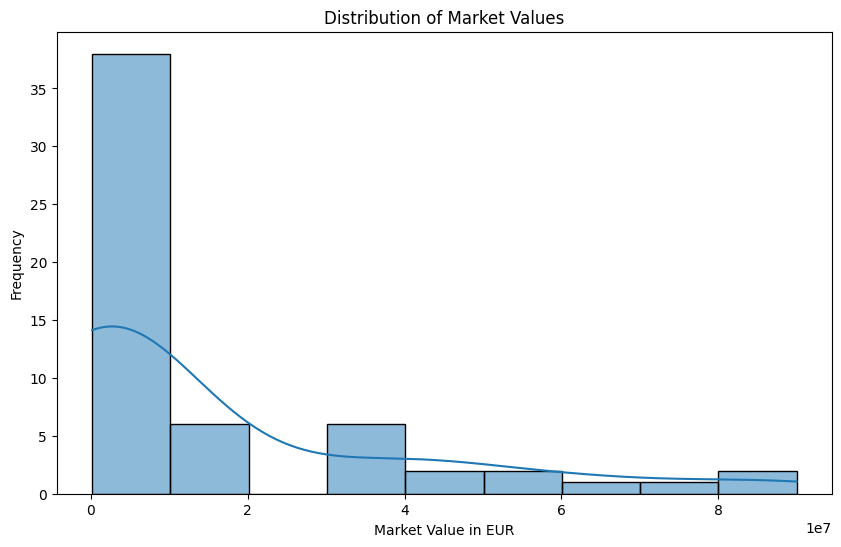

In [120]:
plt.figure(figsize=(10, 6))
sns.histplot(barca_players_df['market_value_in_eur'], kde=True)
plt.title('Distribution of Market Values')
plt.xlabel('Market Value in EUR')
plt.ylabel('Frequency')
plt.show()

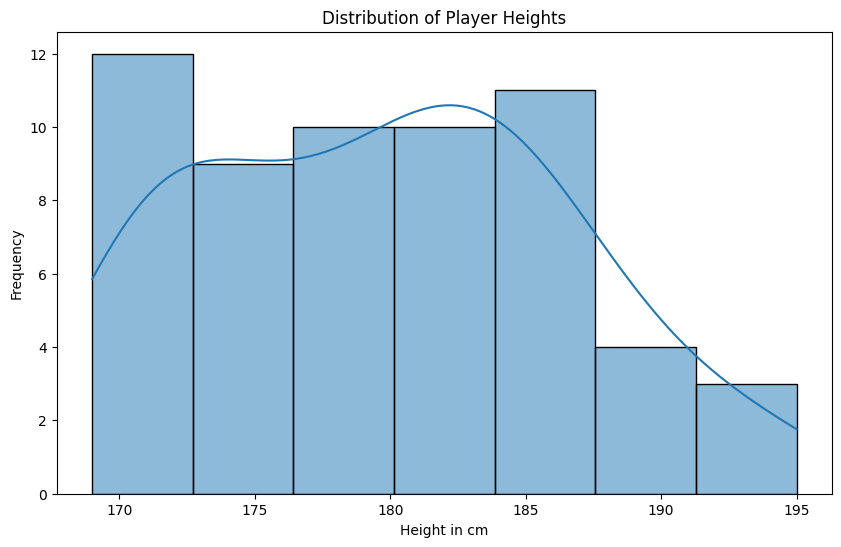

In [121]:
plt.figure(figsize=(10, 6))
sns.histplot(barca_players_df['height_in_cm'], kde=True)
plt.title('Distribution of Player Heights')
plt.xlabel('Height in cm')
plt.ylabel('Frequency')
plt.show()

In [122]:
barca_players_df['date_of_birth'] = pd.to_datetime(barca_players_df['date_of_birth'])
barca_players_df['age'] = (pd.Timestamp('now') - barca_players_df['date_of_birth']).astype('<m8[Y]')


<ipython-input-122-2e0b488e1d84>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  barca_players_df['date_of_birth'] = pd.to_datetime(barca_players_df['date_of_birth'])
<ipython-input-122-2e0b488e1d84>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  barca_players_df['age'] = (pd.Timestamp('now') - barca_players_df['date_of_birth']).astype('<m8[Y]')


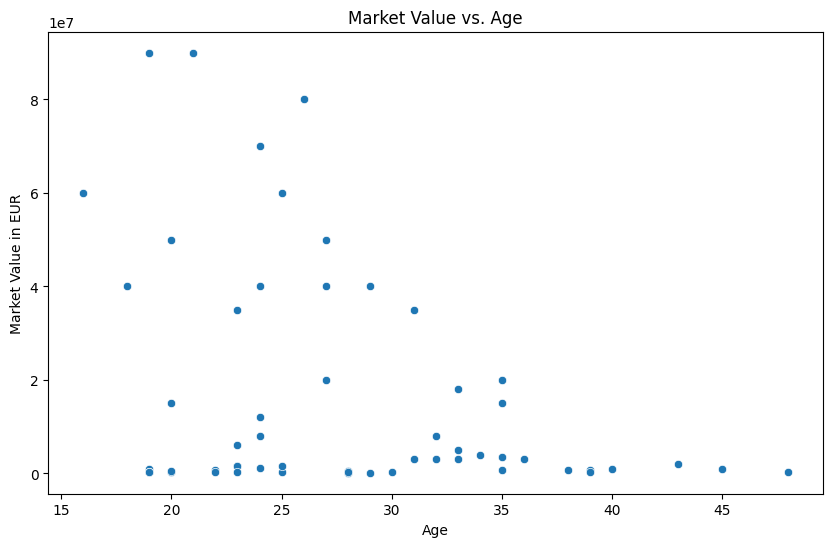

In [123]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='market_value_in_eur', data=barca_players_df)
plt.title('Market Value vs. Age')
plt.xlabel('Age')
plt.ylabel('Market Value in EUR')
plt.show()

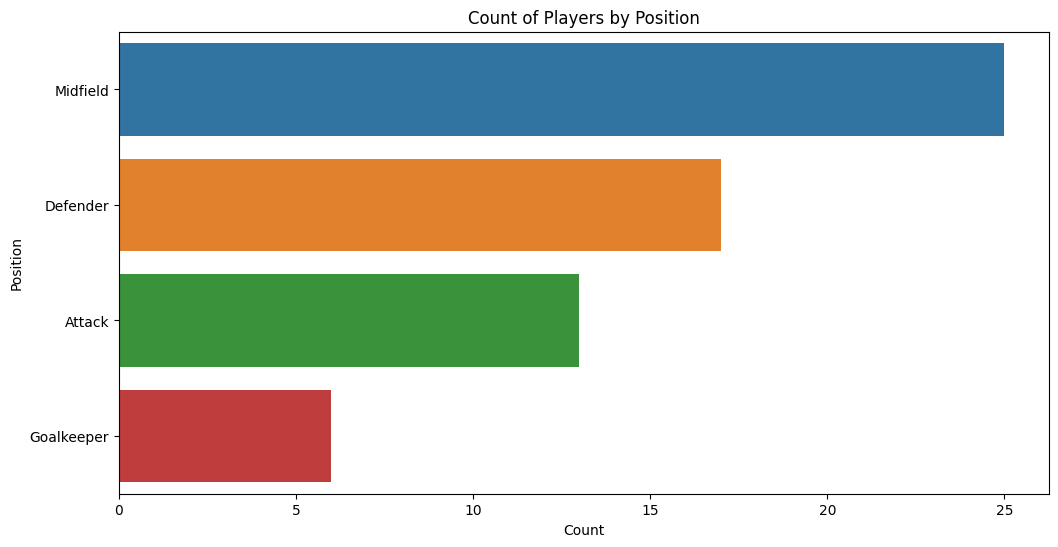

In [124]:
plt.figure(figsize=(12, 6))
sns.countplot(y='position', data=barca_players_df, order = barca_players_df['position'].value_counts().index)
plt.title('Count of Players by Position')
plt.xlabel('Count')
plt.ylabel('Position')
plt.show()

In [125]:
top_5_valued_players = barca_players_df.sort_values(by='market_value_in_eur', ascending=False).head(5)
print("\nTop 5 Players with Highest Market Value:")
print(top_5_valued_players[['name', 'market_value_in_eur']])


Top 5 Players with Highest Market Value:
                  name  market_value_in_eur
27374            Pedri           90000000.0
26728             Gavi           90000000.0
17908  Frenkie de Jong           80000000.0
23054    Ronald Araujo           70000000.0
21285     Jules Koundé           60000000.0


## Club Games

In [159]:
club_games_df = pd.read_csv(f'{folder_path}/club_games.csv')
club_games_df.head(5)

,game_id,club_id,own_goals,own_position,own_manager_name,opponent_id,opponent_goals,opponent_position,opponent_manager_name,hosting,is_win
0,2221751,431,1,NaN,Lutz Göttling,60,2,NaN,Christian Streich,Home,0
1,2221755,83,3,NaN,Ralph Hasenhüttl,4795,0,NaN,Tomas Oral,Home,1
2,2222597,3725,2,2.0,Stanislav Cherchesov,232,1,5.0,Unai Emery,Home,1
3,2222627,2696,0,11.0,Andrey Kobelev,4128,2,10.0,Rustem Khuzin,Home,0
4,2222658,2410,0,2.0,Leonid Slutski,121,2,13.0,Dan Petrescu,Home,0


In [161]:
barca_club_games_df = club_games_df[ club_games_df['club_id'] == barca_club_id ]
barca_club_games_df.head(5)

,game_id,club_id,own_goals,own_position,own_manager_name,opponent_id,opponent_goals,opponent_position,opponent_manager_name,hosting,is_win
661,2421870,131,5,NaN,Gerardo Martino,3368,1,NaN,Joaquín Caparrós,Home,1
798,2475184,131,3,1.0,Luis Enrique,1531,0,20.0,Fran Escribá,Home,1
1220,2594656,131,4,1.0,Luis Enrique,16795,0,17.0,José Ramón Sandoval,Home,1
1396,2645721,131,3,NaN,Luis Enrique,10948,0,NaN,Luiz Felipe Scolari,Home,1
1424,2666000,131,2,NaN,Luis Enrique,368,0,NaN,Unai Emery,Home,1


In [162]:
barca_club_games_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 641 entries, 661 to 131482
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   game_id                641 non-null    int64  
 1   club_id                641 non-null    int64  
 2   own_goals              641 non-null    int64  
 3   own_position           432 non-null    float64
 4   own_manager_name       641 non-null    object 
 5   opponent_id            641 non-null    int64  
 6   opponent_goals         641 non-null    int64  
 7   opponent_position      432 non-null    float64
 8   opponent_manager_name  641 non-null    object 
 9   hosting                641 non-null    object 
 10  is_win                 641 non-null    int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 60.1+ KB


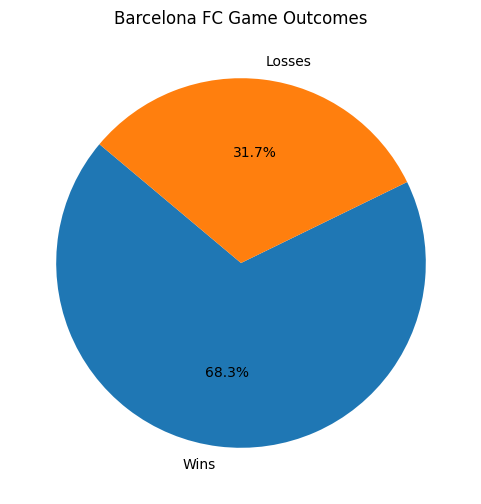

In [163]:
win_count = barca_club_games_df['is_win'].sum()
loss_count = len(barca_club_games_df) - win_count
plt.figure(figsize=(6, 6))
plt.pie([win_count, loss_count], labels=['Wins', 'Losses'], autopct='%1.1f%%', startangle=140)
plt.title('Barcelona FC Game Outcomes')
plt.show()


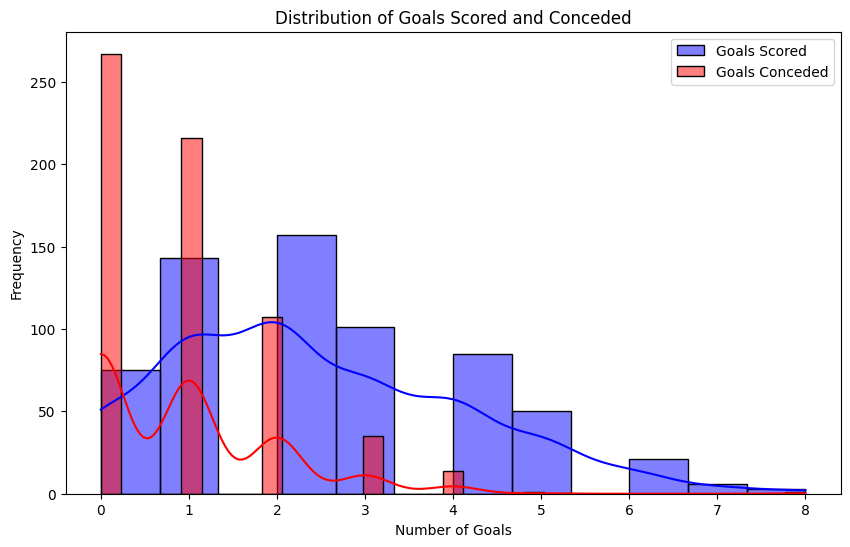

In [164]:
plt.figure(figsize=(10, 6))
sns.histplot(barca_club_games_df['own_goals'], color='blue', label='Goals Scored', kde=True)
sns.histplot(barca_club_games_df['opponent_goals'], color='red', label='Goals Conceded', kde=True)
plt.title('Distribution of Goals Scored and Conceded')
plt.xlabel('Number of Goals')
plt.ylabel('Frequency')
plt.legend()
plt.show()

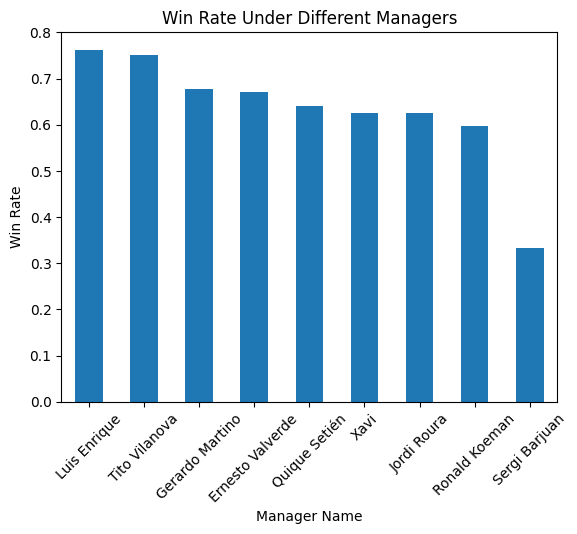

In [165]:
manager_performance = barca_club_games_df.groupby('own_manager_name')['is_win'].mean()
manager_performance.sort_values(ascending=False).plot(kind='bar')
plt.title('Win Rate Under Different Managers')
plt.xlabel('Manager Name')
plt.ylabel('Win Rate')
plt.xticks(rotation=45)
plt.show()

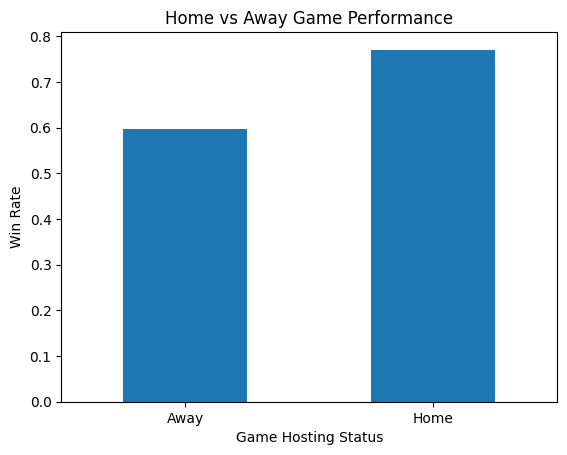

In [166]:
home_away_performance = barca_club_games_df.groupby('hosting')['is_win'].mean()
home_away_performance.plot(kind='bar')
plt.title('Home vs Away Game Performance')
plt.xlabel('Game Hosting Status')
plt.ylabel('Win Rate')
plt.xticks(rotation=0)
plt.show()

## Competitions

In [132]:
unique_competitions = barca_games_df['competition_id'].unique()
unique_competitions

array(['CDR', 'ES1', 'CL', 'EL', 'SUC', 'USC', 'KLUB'], dtype=object)

In [128]:
competitions_df = pd.read_csv(f'{folder_path}/competitions.csv')
competitions_df.head(5)

,competition_id,competition_code,name,sub_type,type,country_id,country_name,domestic_league_code,confederation,url
0,CIT,italy-cup,italy-cup,domestic_cup,domestic_cup,75,Italy,IT1,europa,https://www.transfermarkt.co.uk/italy-cup/star...
1,NLSC,johan-cruijff-schaal,johan-cruijff-schaal,domestic_super_cup,other,122,Netherlands,NL1,europa,https://www.transfermarkt.co.uk/johan-cruijff-...
2,GRP,kypello-elladas,kypello-elladas,domestic_cup,domestic_cup,56,Greece,GR1,europa,https://www.transfermarkt.co.uk/kypello-ellada...
3,POSU,supertaca-candido-de-oliveira,supertaca-candido-de-oliveira,domestic_super_cup,other,136,Portugal,PO1,europa,https://www.transfermarkt.co.uk/supertaca-cand...
4,RUSS,russian-super-cup,russian-super-cup,domestic_super_cup,other,141,Russia,RU1,europa,https://www.transfermarkt.co.uk/russian-super-...


In [134]:
related_competitions = competitions_df[competitions_df['competition_id'].isin(unique_competitions)]

related_competitions

,competition_id,competition_code,name,sub_type,type,country_id,country_name,domestic_league_code,confederation,url
5,SUC,supercopa,supercopa,domestic_super_cup,other,157,Spain,ES1,europa,https://www.transfermarkt.co.uk/supercopa/star...
6,USC,uefa-super-cup,uefa-super-cup,uefa_super_cup,other,-1,NaN,NaN,europa,https://www.transfermarkt.co.uk/uefa-super-cup...
8,EL,europa-league,europa-league,europa_league,international_cup,-1,NaN,NaN,europa,https://www.transfermarkt.co.uk/europa-league/...
9,ES1,laliga,laliga,first_tier,domestic_league,157,Spain,ES1,europa,https://www.transfermarkt.co.uk/laliga/startse...
25,CDR,copa-del-rey,copa-del-rey,domestic_cup,domestic_cup,157,Spain,ES1,europa,https://www.transfermarkt.co.uk/copa-del-rey/s...
26,CL,uefa-champions-league,uefa-champions-league,uefa_champions_league,international_cup,-1,NaN,NaN,europa,https://www.transfermarkt.co.uk/uefa-champions...
31,KLUB,fifa-klub-wm,fifa-klub-wm,fifa_club_world_cup,other,-1,NaN,NaN,europa,https://www.transfermarkt.co.uk/fifa-klub-wm/s...


## Game Events

In [167]:
game_events_df = pd.read_csv(f'{folder_path}/game_events.csv')
game_events_df.head(5)

,game_event_id,date,game_id,minute,type,club_id,player_id,description,player_in_id,player_assist_id
0,2f41da30c471492e7d4a984951671677,2012-08-05,2211607,77,Cards,610,4425,"1. Yellow card , Mass confrontation",NaN,NaN
1,a72f7186d132775f234d3e2f7bc0ed5b,2012-08-05,2211607,77,Cards,383,33210,"1. Yellow card , Mass confrontation",NaN,NaN
2,b2d721eaed4692a5c59a92323689ef18,2012-08-05,2211607,3,Goals,383,36500,", Header, 1. Tournament Goal Assist: , Corner,...",NaN,56416.0
3,aef768899cedac0c9a650980219075a2,2012-08-05,2211607,53,Goals,383,36500,", Right-footed shot, 2. Tournament Goal Assist...",NaN,146258.0
4,5d6d9533023057b6619ecd145a038bbe,2012-08-05,2211607,74,Substitutions,383,36500,", Not reported",49499.0,NaN


In [168]:
barca_game_events_df = game_events_df[ game_events_df['club_id'] == barca_club_id ]
barca_game_events_df.head(5)

,game_event_id,date,game_id,minute,type,club_id,player_id,description,player_in_id,player_assist_id
30159,827f893d2e640563972235ae72b3b8fe,2012-08-26,2242828,80,Cards,131,7594,"1. Yellow card , Handball",NaN,NaN
30160,31a36113bbf411c4bd2312a495809a97,2012-08-26,2242828,70,Substitutions,131,7600,", Not reported",7607.0,NaN
30162,b42516ce4abc6c7dfa228a2e2a16787d,2012-08-26,2242828,63,Substitutions,131,8806,", Not reported",65278.0,NaN
30163,7708c7146b539d6913d0166bd9cdc77c,2012-08-26,2242828,76,Cards,131,18944,"1. Yellow card , Unsporting behaviour",NaN,NaN
30165,168cd286940c408e59b93464257c752c,2012-08-26,2242828,74,Goals,131,28003,", Left-footed shot, 3. Goal of the Season Assi...",NaN,40433.0


In [170]:
barca_game_events_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3875 entries, 30159 to 668074
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   game_event_id     3875 non-null   object 
 1   date              3875 non-null   object 
 2   game_id           3875 non-null   int64  
 3   minute            3875 non-null   int64  
 4   type              3875 non-null   object 
 5   club_id           3875 non-null   int64  
 6   player_id         3875 non-null   int64  
 7   description       2271 non-null   object 
 8   player_in_id      2045 non-null   float64
 9   player_assist_id  306 non-null    float64
dtypes: float64(2), int64(4), object(4)
memory usage: 333.0+ KB


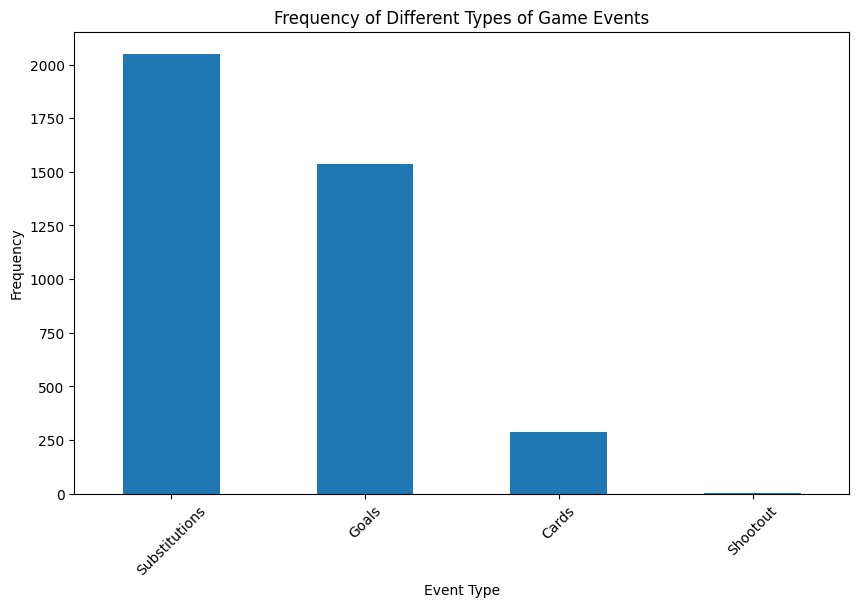

In [171]:
event_types = barca_game_events_df['type'].value_counts()
plt.figure(figsize=(10, 6))
event_types.plot(kind='bar')
plt.title('Frequency of Different Types of Game Events')
plt.xlabel('Event Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

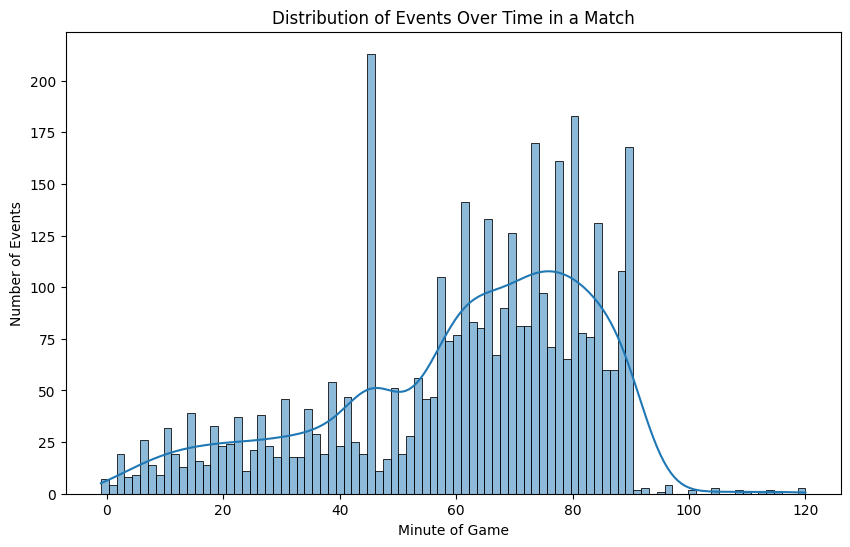

In [172]:
plt.figure(figsize=(10, 6))
sns.histplot(barca_game_events_df['minute'], bins=90, kde=True)  # Assuming a 90-minute match
plt.title('Distribution of Events Over Time in a Match')
plt.xlabel('Minute of Game')
plt.ylabel('Number of Events')
plt.show()

## Player Valuations


In [107]:
player_valuations = pd.read_csv(f'{folder_path}/player_valuations.csv')
player_valuations.head(5)

,player_id,date,datetime,dateweek,market_value_in_eur,current_club_id,player_club_domestic_competition_id
0,405973,2000-01-20,2000-01-20 00:00:00,2000-01-17,150000,3057,BE1
1,342216,2001-07-20,2001-07-20 00:00:00,2001-07-16,100000,1241,SC1
2,3132,2003-12-09,2003-12-09 00:00:00,2003-12-08,400000,126,TR1
3,6893,2003-12-15,2003-12-15 00:00:00,2003-12-15,900000,984,GB1
4,10,2004-10-04,2004-10-04 00:00:00,2004-10-04,7000000,398,IT1


In [119]:
merged_df = pd.merge(barca_players_df, player_valuations, on='player_id', how='left')

merged_df.head(5)

# FIXME it doesn't work as it supposed to work

,player_id,first_name,last_name,name,last_season,current_club_id_x,player_code,country_of_birth,city_of_birth,country_of_citizenship,...,current_club_domestic_competition_id,current_club_name,market_value_in_eur_x,highest_market_value_in_eur,date,datetime,dateweek,market_value_in_eur_y,current_club_id_y,player_club_domestic_competition_id
0,7537,José Manuel,Pinto,José Manuel Pinto,2013,131,jose-manuel-pinto,Spain,El Puerto de Santa María,Spain,...,ES1,Futbol Club Barcelona,300000.0,2000000.0,2004-10-04,2004-10-04 00:00:00,2004-10-04,50000.0,131.0,ES1
1,7537,José Manuel,Pinto,José Manuel Pinto,2013,131,jose-manuel-pinto,Spain,El Puerto de Santa María,Spain,...,ES1,Futbol Club Barcelona,300000.0,2000000.0,2006-12-28,2006-12-28 00:00:00,2006-12-25,1000000.0,131.0,ES1
2,7537,José Manuel,Pinto,José Manuel Pinto,2013,131,jose-manuel-pinto,Spain,El Puerto de Santa María,Spain,...,ES1,Futbol Club Barcelona,300000.0,2000000.0,2007-02-28,2007-02-28 00:00:00,2007-02-26,1500000.0,131.0,ES1
3,7537,José Manuel,Pinto,José Manuel Pinto,2013,131,jose-manuel-pinto,Spain,El Puerto de Santa María,Spain,...,ES1,Futbol Club Barcelona,300000.0,2000000.0,2007-10-04,2007-10-04 00:00:00,2007-10-01,2000000.0,131.0,ES1
4,7537,José Manuel,Pinto,José Manuel Pinto,2013,131,jose-manuel-pinto,Spain,El Puerto de Santa María,Spain,...,ES1,Futbol Club Barcelona,300000.0,2000000.0,2008-07-10,2008-07-10 00:00:00,2008-07-07,1600000.0,131.0,ES1


## Analytics

### Player Performance Index

### Youth Development Analysis